# EMPLOYEE ATTRITION | COMPARATIVE ANALYSIS OF CLASSIFICATION ML TECHNIQUES

# **TABLE OF CONTENT**

1. [Importing libraries](#1.)
1. [Data Description](#2.)
 * [Checking for null values](#2.1)
 * [Checking for imbalanced dataset or not](#2.2)
1. [Exploratory Data Analysis](#3.)
 * [Analyzing Numerical features](#3.1) 
 * [Outliers in the dataset](#3.2)
 * [Analyzing Categorical features](#3.3)
 * [Numerical Features v/s Attrition](#3.4)
    * [Age feature](#3.4.1)
    * [DistanceFromHome feature](#3.4.2)
    * [MonthlyIncome feature](#3.4.3)
    * [PercentSalaryHike feature](#3.4.4)
    * [YearsAtCompany feature](#3.4.5)
    * [YearsSinceLastPromotion feature](#3.4.6)   
 * [Categorical Features v/s Attrition](#3.5)
    * [BusinessTravel feature](#3.5.1)
    * [Department feature](#3.5.2)
    * [EducationField feature](#3.5.3)
    * [Gender feature](#3.5.4)
    * [OverTime feature](#3.5.5)
    * [EnvironmentSatisfaction feature](#3.5.6)
 * [Inferences](#3.6)
1. [Feature Engineering](#4.)
 * [Correlation between features](#4.1)
 * [Feature Scaling](#4.2)
1. [Train-Test Split](#5.)
 * [Stratified K-Fold](#5.1)
1. [Model Building](#6.)
1. [Model Evaluation](#7.)
 * [Model Accuracies](#7.1)
 * [Mean Accuracy of Classification models](#7.2)
 * [Confusion Matrix of all the models](#7.3)
 * [Classification Reports of all the models](#7.4)

<a id="1."></a>
# IMPORTING LIBRARIERS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<a id="2."></a>
# DATA DESCRIPTION

In [2]:
data = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
113,24,No,Travel_Rarely,1127,Research & Development,18,1,Life Sciences,1,150,...,3,80,1,6,2,3,5,3,1,2
82,55,No,Travel_Rarely,111,Sales,1,2,Life Sciences,1,106,...,4,80,1,24,4,3,1,0,1,0
1296,30,No,Travel_Rarely,1092,Research & Development,10,3,Medical,1,1816,...,2,80,0,9,3,3,7,7,0,2
1019,36,No,Travel_Rarely,329,Sales,16,4,Marketing,1,1436,...,1,80,2,11,3,2,3,2,0,2
613,34,No,Travel_Rarely,829,Human Resources,3,2,Human Resources,1,847,...,3,80,1,4,1,1,3,2,0,2
225,59,No,Travel_Rarely,142,Research & Development,3,3,Life Sciences,1,309,...,1,80,1,7,6,3,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
800,28,Yes,Travel_Frequently,1009,Research & Development,1,3,Medical,1,1111,...,1,80,2,1,2,3,1,0,0,0
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,...,3,80,1,19,6,4,1,0,0,0
582,40,No,Travel_Frequently,791,Research & Development,2,2,Medical,1,807,...,4,80,1,8,2,3,8,7,3,7


As we can see from our dataset 'Attrition' is our target variable.

In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<a id="2.1"></a>
### CHECKING FOR NULL VALUES

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in our dataset

<a id="2.2"></a>
### CHECKING FOR IMBALANCED DATASET OR NOT

In [8]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

237 employees out of 1470 left the company

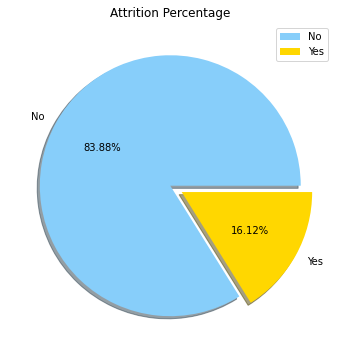

In [9]:
labels = data['Attrition'].value_counts().index
size = data['Attrition'].value_counts().values
plt.figure(figsize = (6,6))
plt.pie(size,colors = ['lightskyblue', 'gold'],explode = (0, 0.1), labels = labels,shadow = True,autopct = "%.2f%%")
plt.title('Attrition Percentage')
plt.axis('off')
plt.legend()

Positive class accounts for about 16.12% of data.So we can say that our dataset is imbalanced.

In [10]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

<a id="3"></a>
# EXPLORATORY DATA ANALYSIS

In [11]:
#Numerical Features
num_features = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [12]:
#Categorical Features
cat_features = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked','TrainingTimesLastYear','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

In [13]:
print("Number of numerical features in our dataset = ",len(num_features))

Number of numerical features in our dataset =  12


In [14]:
print("Number of categorical features in our dataset = ",len(cat_features))

Number of categorical features in our dataset =  18


<a id="3.1"></a>
### ANALYZING NUMERICAL FEATURES

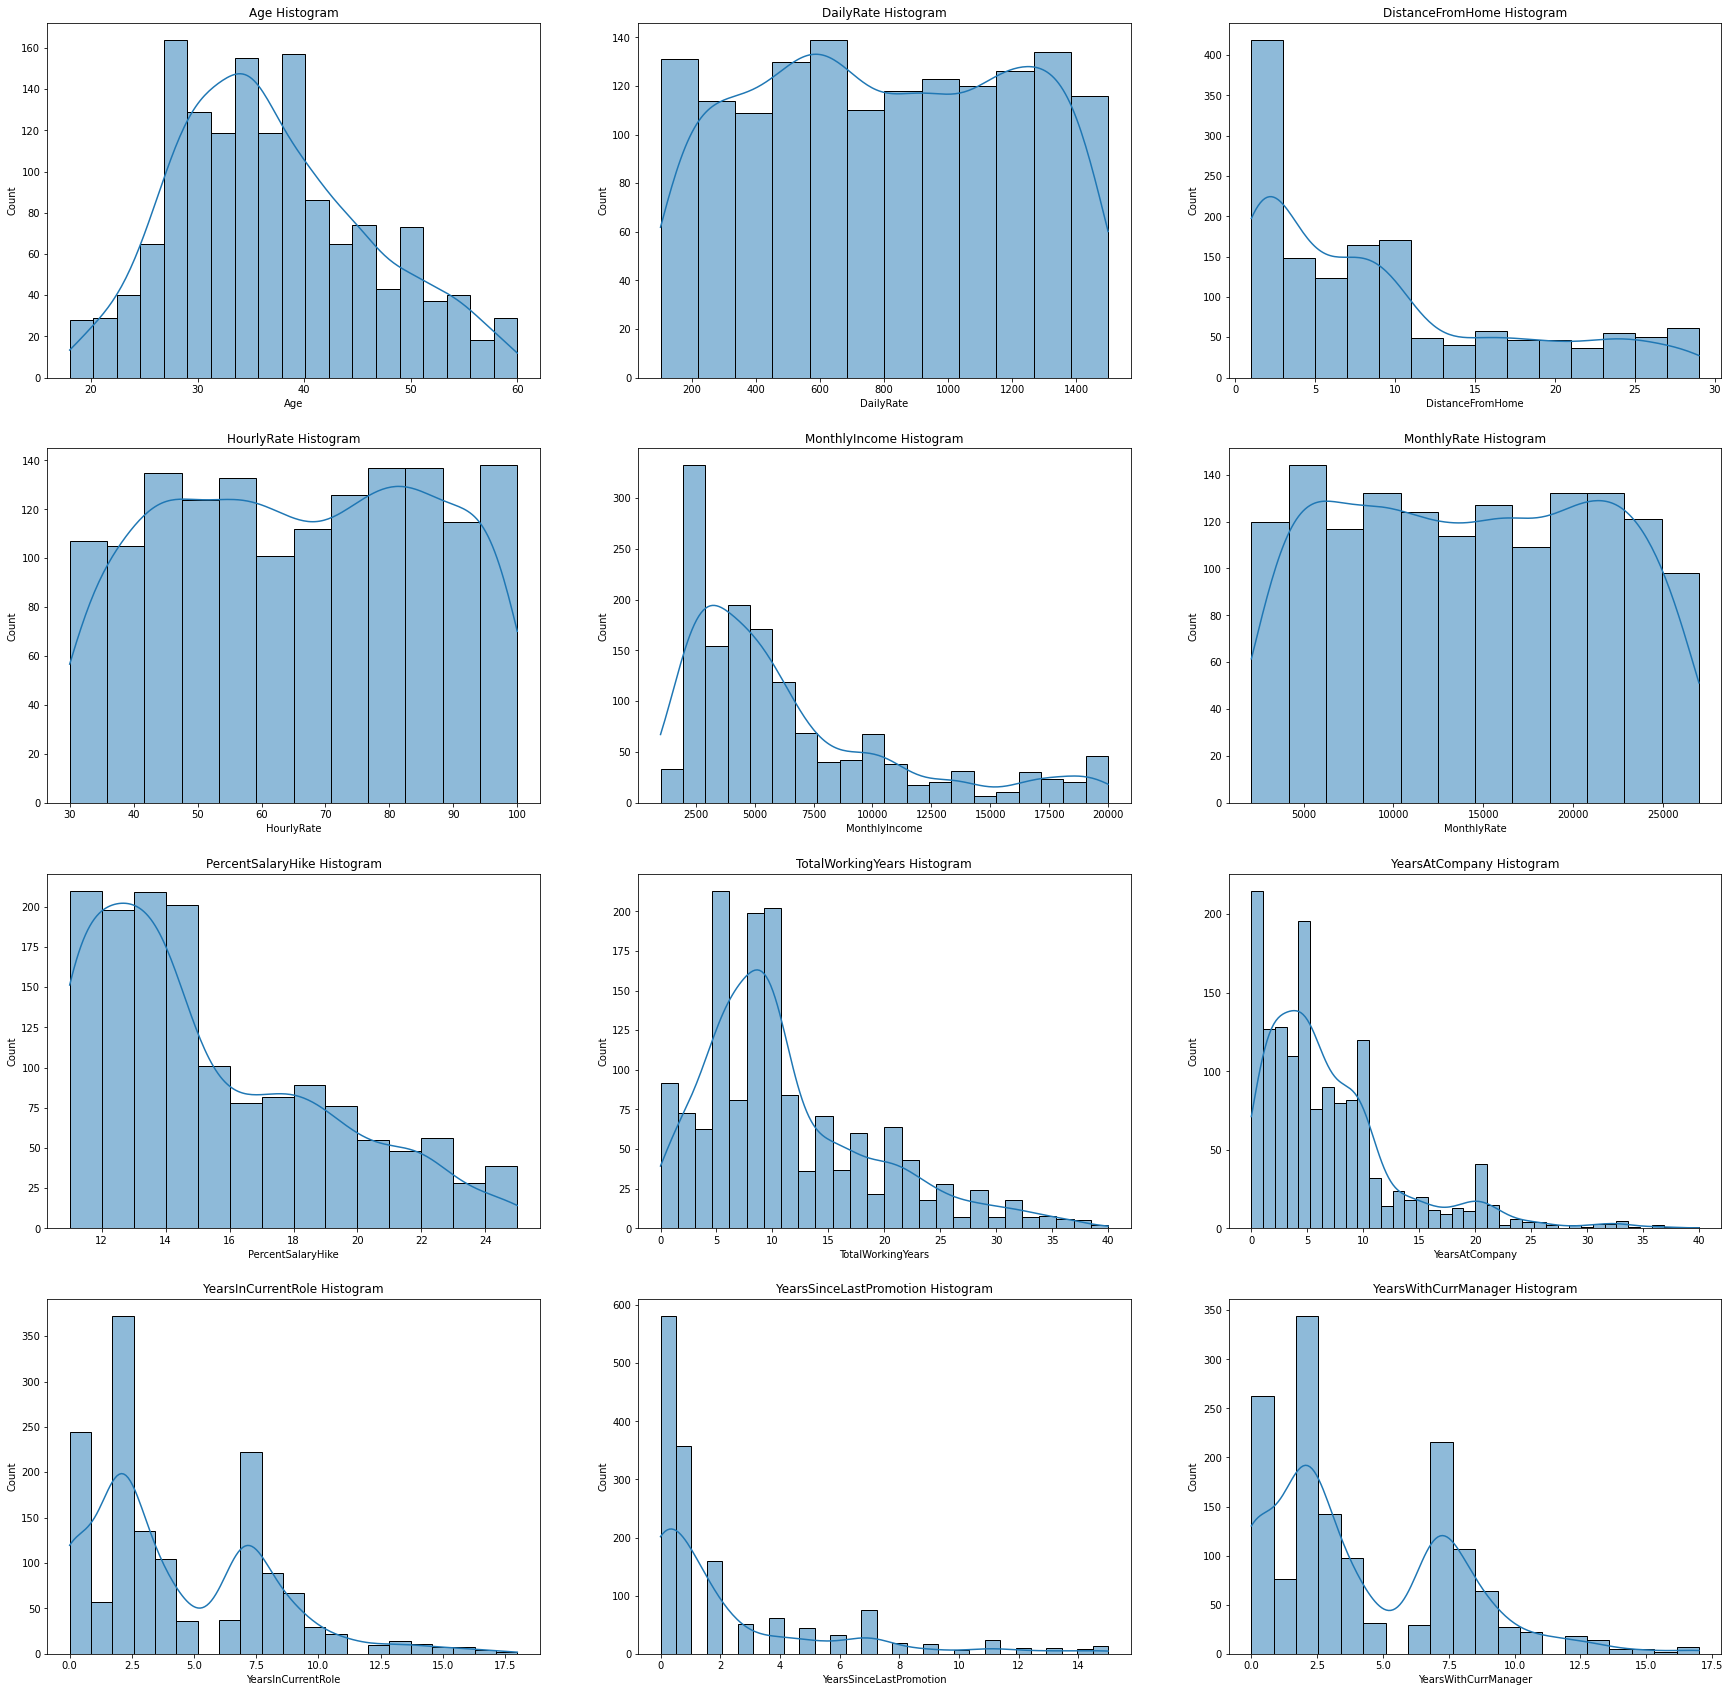

In [15]:
plt.figure(figsize = (30,30))
for i,feature in enumerate(num_features):
    ax = plt.subplot(4,3,i+1)
    sns.histplot(data[feature],kde = True)
    ax.set_title(feature + " Histogram")

<a id="3.2"></a>
### OUTLIERS IN THE DATSET

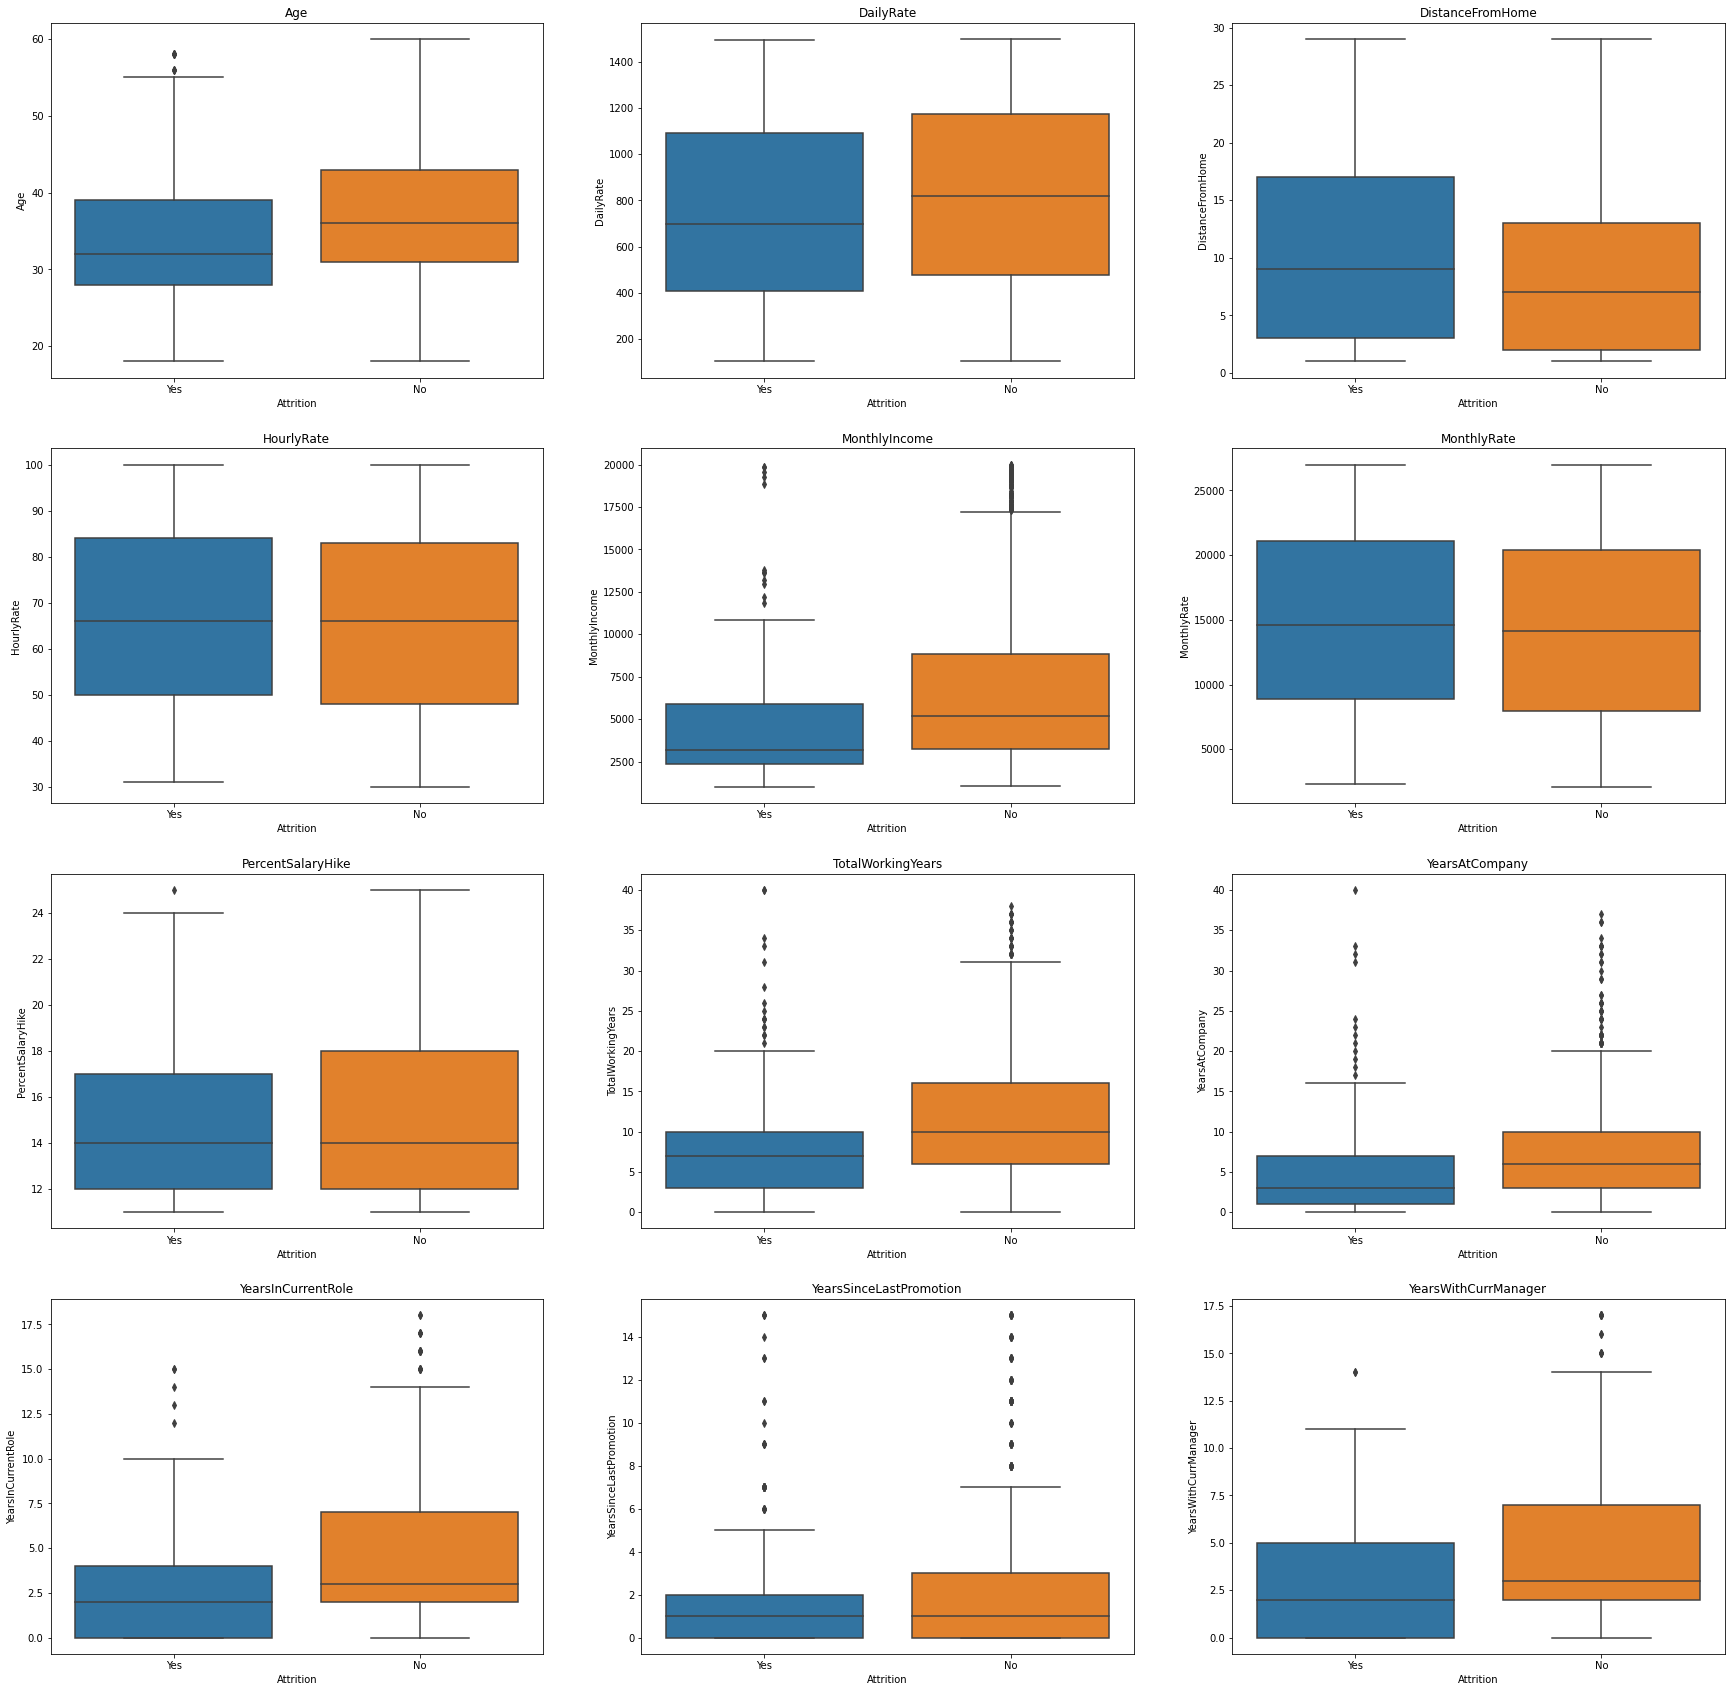

In [16]:
plt.figure(figsize = (30,30))
for i,feature in enumerate(num_features):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(y = data[feature], x = data['Attrition'])
    ax.set_title(feature)

<a id="3.3"></a>
### ANALYZING CATEGORICAL FEATURES

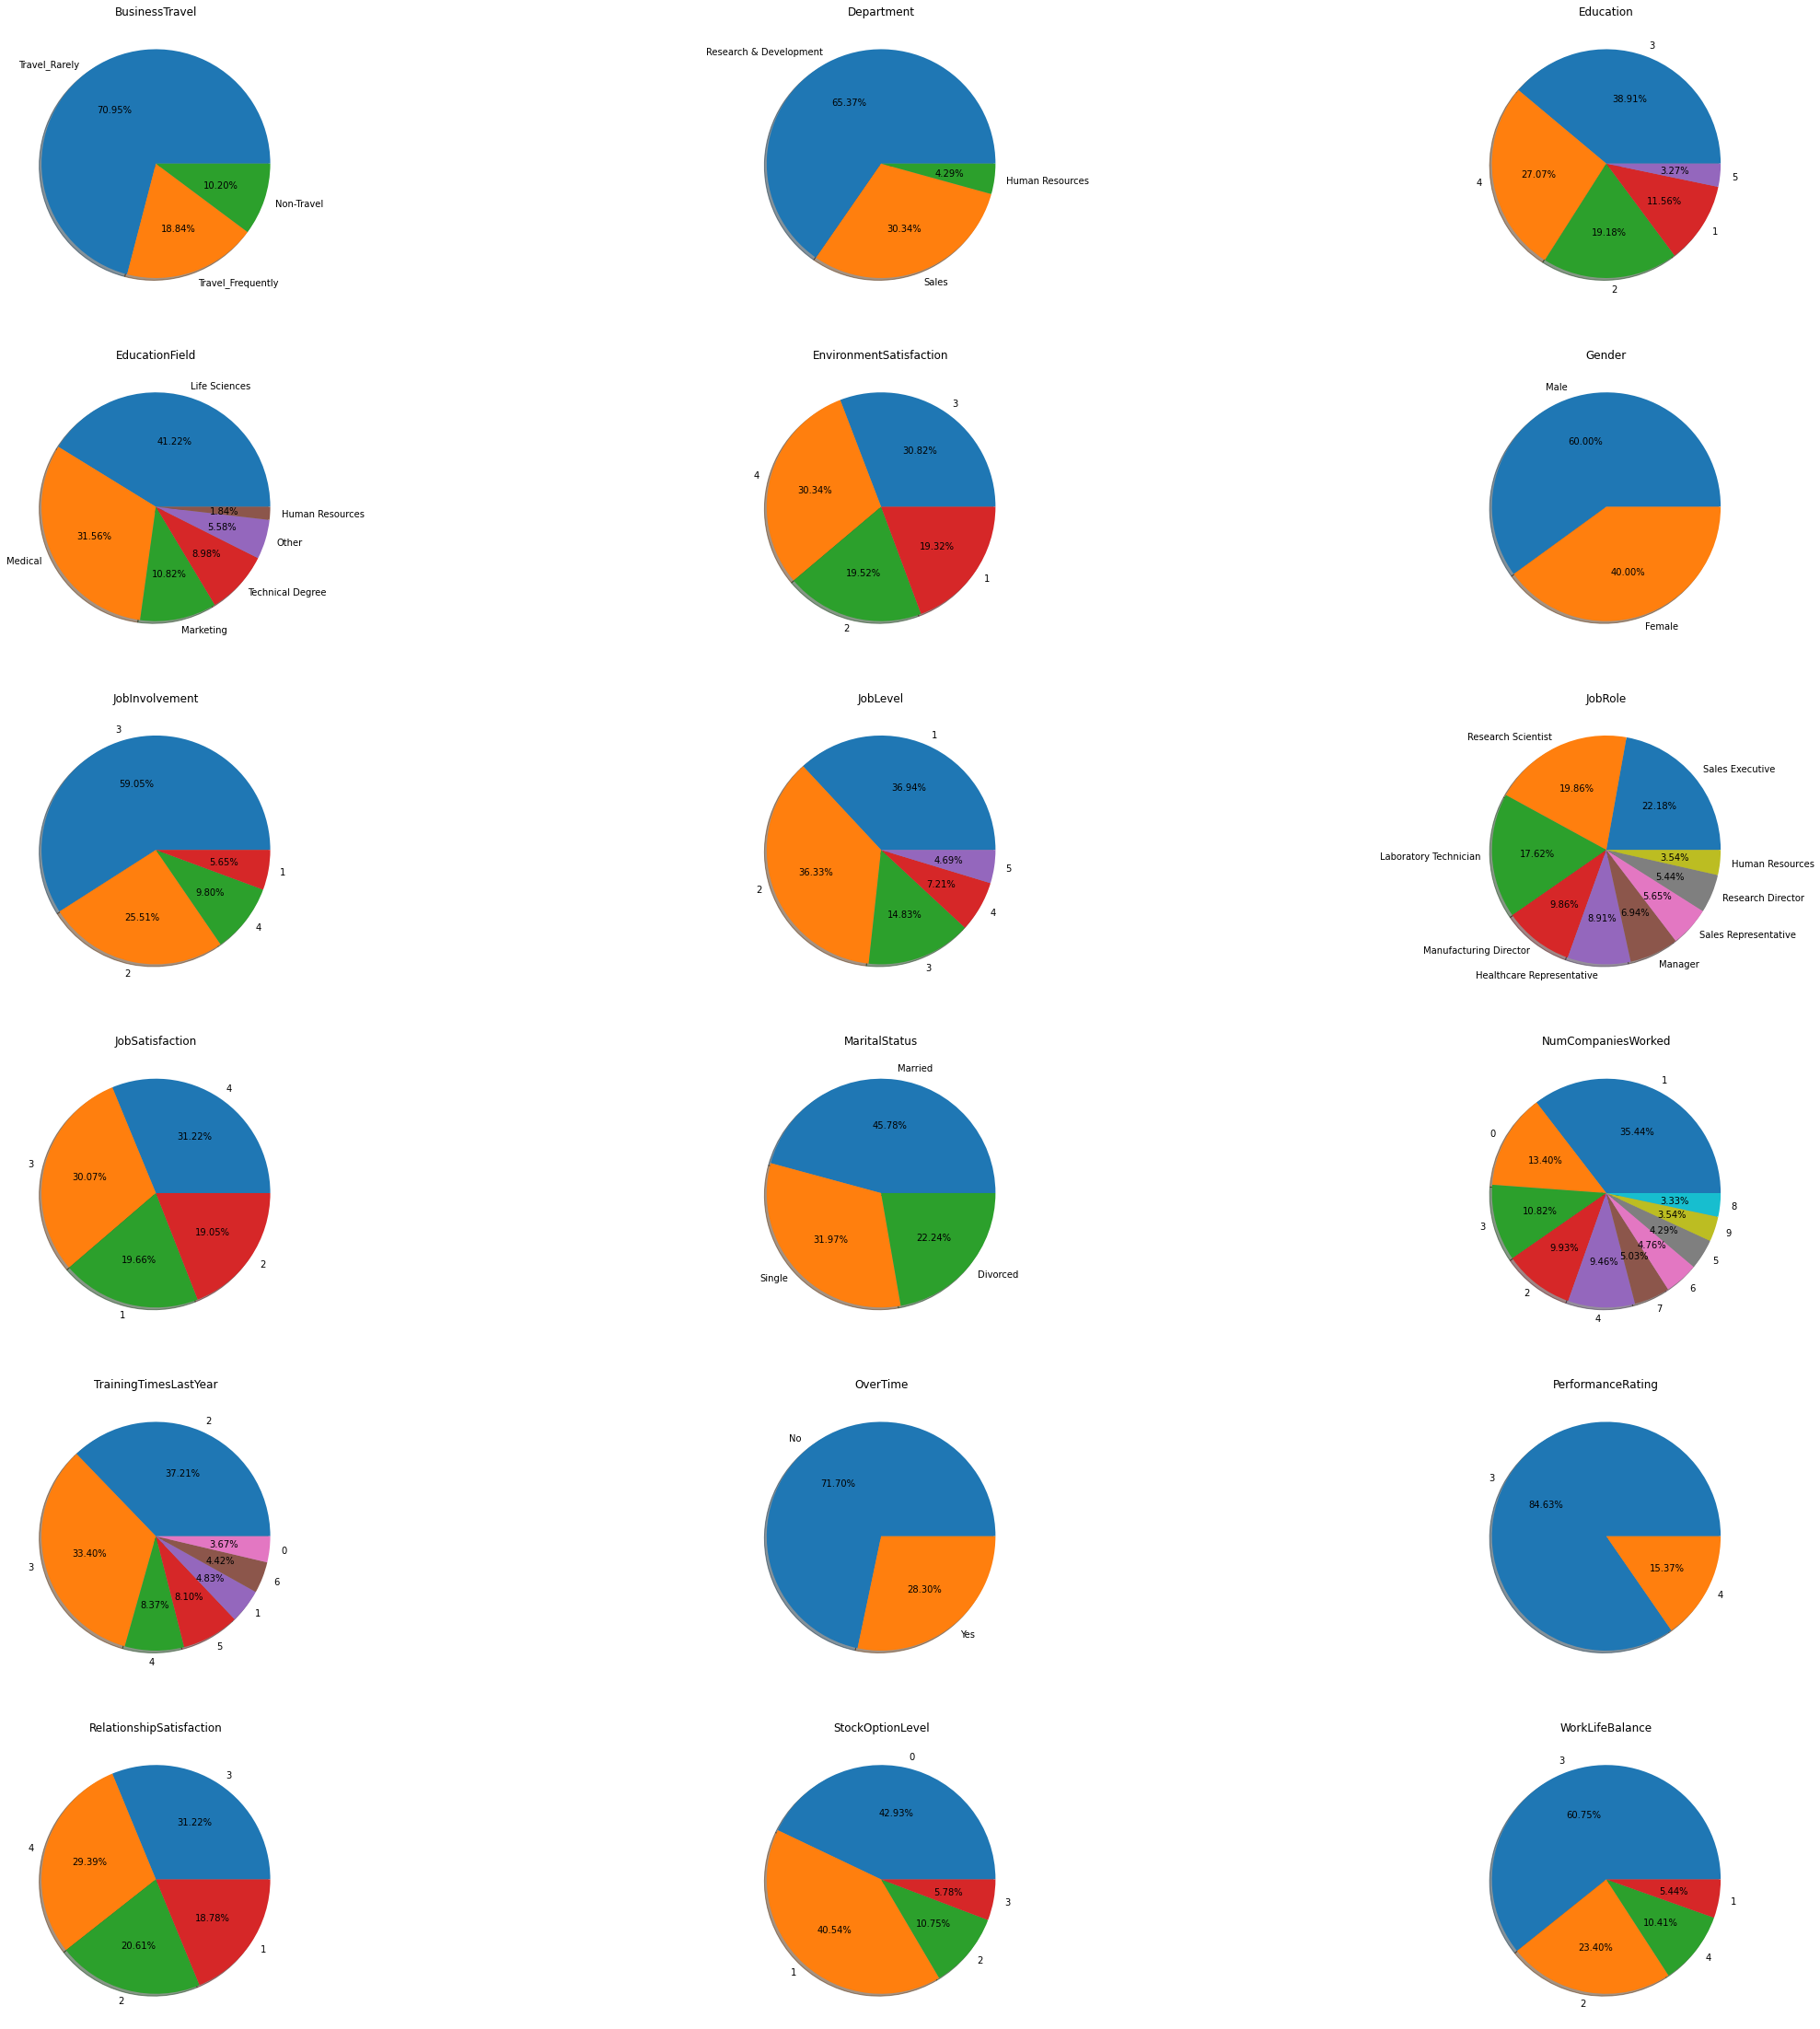

In [17]:
plt.figure(figsize = (40,40))
for i,feature in enumerate(cat_features):
    labels = data[feature].value_counts().index
    size = data[feature].value_counts().values
    ax = plt.subplot(6,3,i+1)
    ax.pie(size,labels = labels,shadow = True,autopct = "%.2f%%")
    plt.title(feature)
    ax.axis('off')

<a id="3.4"></a>
#### Numerical features v/s Attrition

<a id="3.4.1"></a>
##### Age feature

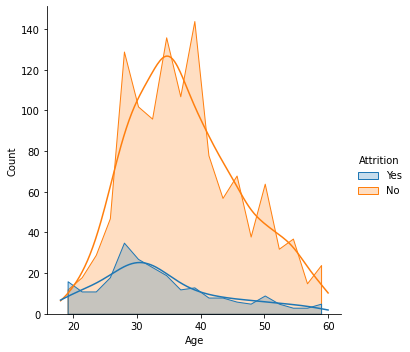

In [18]:
sns.displot(x = "Age", hue = "Attrition",element = "poly", data = data,kde = True)

<a id="3.4.2"></a>
##### DistanceFromHome feature

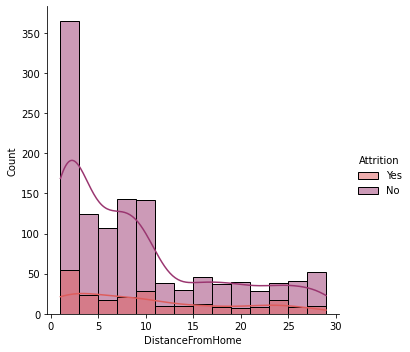

In [19]:
sns.displot(x = "DistanceFromHome", hue = "Attrition", data = data,kde = True,palette = 'flare')

<a id="3.4.3"></a>
##### MonthlyIncome feature

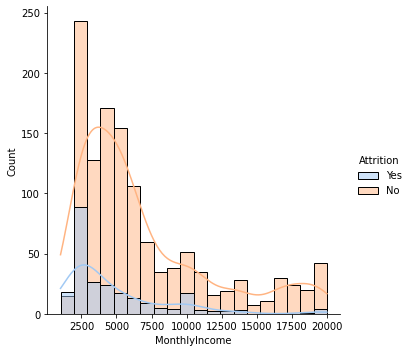

In [20]:
sns.displot(x = "MonthlyIncome", hue = "Attrition", data = data,kde = True,palette = 'pastel')

<a id="3.4.4"></a>
##### PercentSalaryHike feature

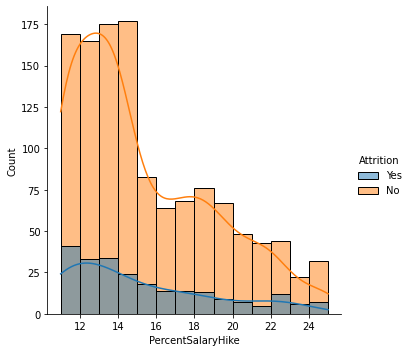

In [21]:
sns.displot(x = "PercentSalaryHike", hue = "Attrition", data = data,kde = True)

<a id="3.4.5"></a>
##### YearsAtCompany feature

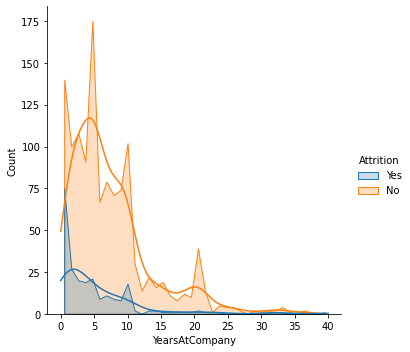

In [22]:
sns.displot(x = "YearsAtCompany",element = "poly", hue = "Attrition", data = data,kde = True)

<a id="3.4.6"></a>
##### YearsSinceLastPromotion feature

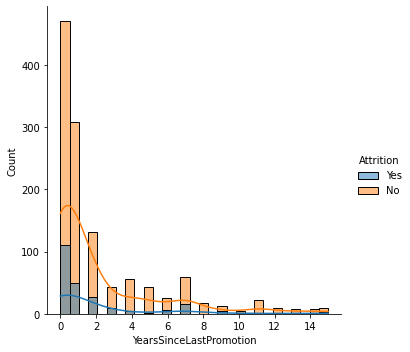

In [23]:
sns.displot(x = "YearsSinceLastPromotion",hue = "Attrition", data = data,kde = True)

<a id="3.5"></a>
#### Categorical features v/s Attrition

<a id="3.5.1"></a>
##### BusinessTravel feature

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

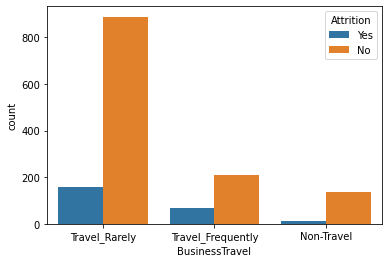

In [24]:
sns.countplot(x = "BusinessTravel",hue = "Attrition",data = data)

(-1.25, 1.25, -1.25, 1.25)

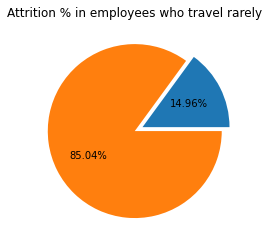

In [25]:
size = [data['BusinessTravel'][(data['Attrition'] == 'Yes') & (data['BusinessTravel'] == 'Travel_Rarely')].count(),data['BusinessTravel'][(data['Attrition'] == 'No') & (data['BusinessTravel'] == 'Travel_Rarely')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees who travel rarely')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

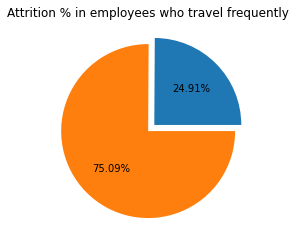

In [26]:
size = [data['BusinessTravel'][(data['Attrition'] == 'Yes') & (data['BusinessTravel'] == 'Travel_Frequently')].count(),data['BusinessTravel'][(data['Attrition'] == 'No') & (data['BusinessTravel'] == 'Travel_Frequently')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees who travel frequently')
plt.axis('off')

<a id="3.5.2"></a>
##### Department feature

In [27]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

<AxesSubplot:xlabel='Department', ylabel='count'>

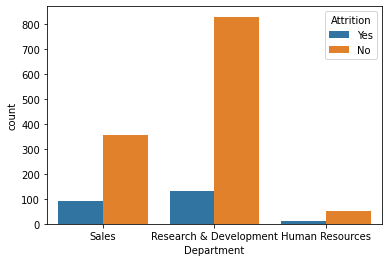

In [28]:
sns.countplot(x = "Department",hue = "Attrition",data = data)

(-1.25, 1.25, -1.25, 1.25)

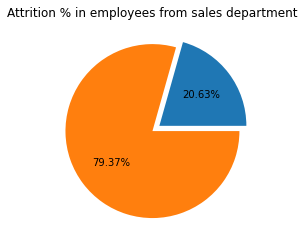

In [29]:
size = [data['Department'][(data['Attrition'] == 'Yes') & (data['Department'] == 'Sales')].count(),data['Department'][(data['Attrition'] == 'No') & (data['Department'] == 'Sales')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from sales department')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

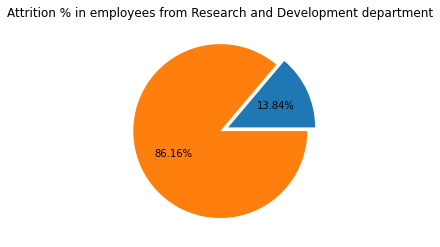

In [30]:
size = [data['Department'][(data['Attrition'] == 'Yes') & (data['Department'] == 'Research & Development')].count(),data['Department'][(data['Attrition'] == 'No') & (data['Department'] == 'Research & Development')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from Research and Development department')
plt.axis('off')

<a id="3.5.3"></a>
##### EducationField feature

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

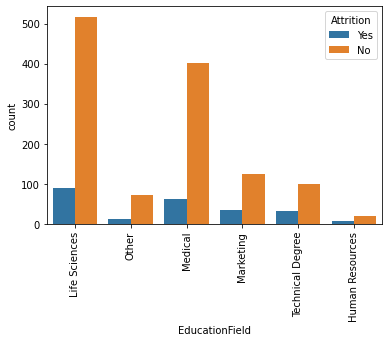

In [31]:
sns.countplot(x = "EducationField",hue = "Attrition",data = data)
plt.xticks(rotation = 90)

(-1.25, 1.25, -1.25, 1.25)

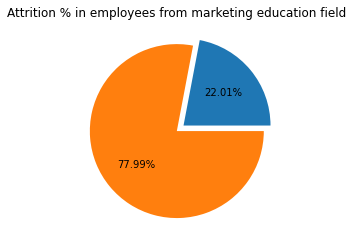

In [32]:
size = [data['EducationField'][(data['Attrition'] == 'Yes') & (data['EducationField'] == 'Marketing')].count(),data['EducationField'][(data['Attrition'] == 'No') & (data['EducationField'] == 'Marketing')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from marketing education field')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

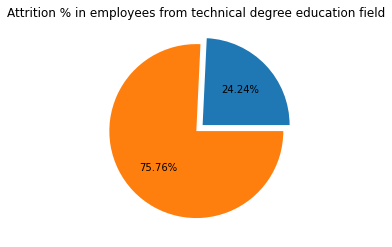

In [33]:
size = [data['EducationField'][(data['Attrition'] == 'Yes') & (data['EducationField'] == 'Technical Degree')].count(),data['EducationField'][(data['Attrition'] == 'No') & (data['EducationField'] == 'Technical Degree')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from technical degree education field')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

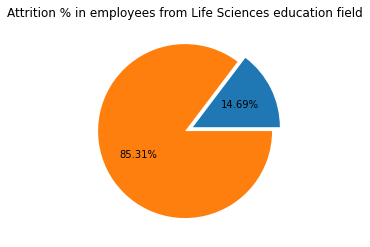

In [34]:
size = [data['EducationField'][(data['Attrition'] == 'Yes') & (data['EducationField'] == 'Life Sciences')].count(),data['EducationField'][(data['Attrition'] == 'No') & (data['EducationField'] == 'Life Sciences')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from Life Sciences education field')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

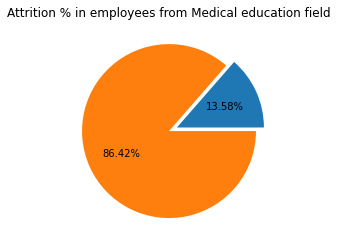

In [35]:
size = [data['EducationField'][(data['Attrition'] == 'Yes') & (data['EducationField'] == 'Medical')].count(),data['EducationField'][(data['Attrition'] == 'No') & (data['EducationField'] == 'Medical')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from Medical education field')
plt.axis('off')

<a id="3.5.4"></a>
##### Gender feature

<AxesSubplot:xlabel='Gender', ylabel='count'>

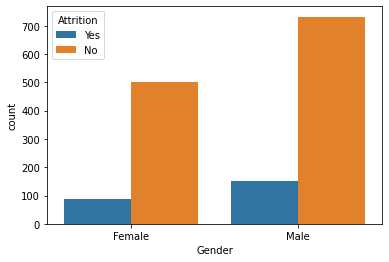

In [36]:
sns.countplot(x = "Gender",hue = "Attrition",data = data)

(-1.25, 1.25, -1.25, 1.25)

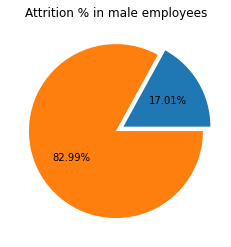

In [37]:
size = [data['Gender'][(data['Attrition'] == 'Yes') & (data['Gender'] == 'Male')].count(),data['Gender'][(data['Attrition'] == 'No') & (data['Gender'] == 'Male')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in male employees')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

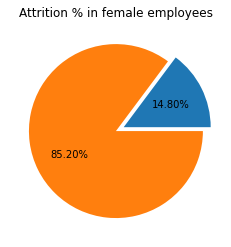

In [38]:
size = [data['Gender'][(data['Attrition'] == 'Yes') & (data['Gender'] == 'Female')].count(),data['Gender'][(data['Attrition'] == 'No') & (data['Gender'] == 'Female')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in female employees')
plt.axis('off')

<a id="3.5.5"></a>
##### OverTime feature

<AxesSubplot:xlabel='OverTime', ylabel='count'>

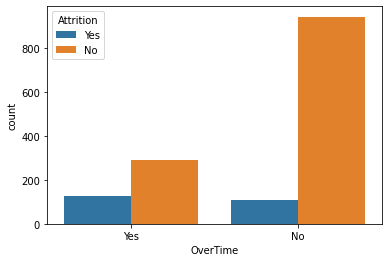

In [39]:
sns.countplot(x = "OverTime",hue = "Attrition",data = data)

(-1.25, 1.25, -1.25, 1.25)

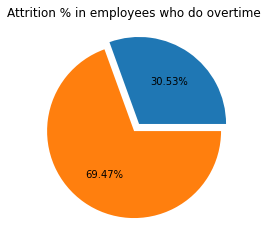

In [40]:
size = [data['OverTime'][(data['Attrition'] == 'Yes') & (data['OverTime'] == 'Yes')].count(),data['OverTime'][(data['Attrition'] == 'No') & (data['OverTime'] == 'Yes')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees who do overtime')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

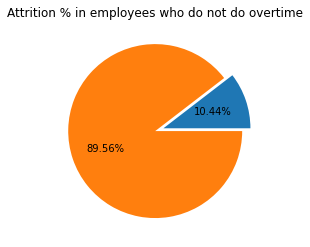

In [41]:
size = [data['OverTime'][(data['Attrition'] == 'Yes') & (data['OverTime'] == 'No')].count(),data['OverTime'][(data['Attrition'] == 'No') & (data['OverTime'] == 'No')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees who do not do overtime')
plt.axis('off')

<a id="3.5.6"></a>
##### EnvironmentSatisfaction feature

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

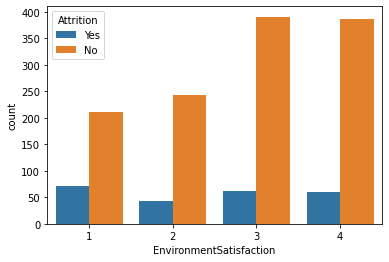

In [42]:
sns.countplot(x = "EnvironmentSatisfaction",hue = "Attrition",data = data)

(-1.25, 1.25, -1.25, 1.25)

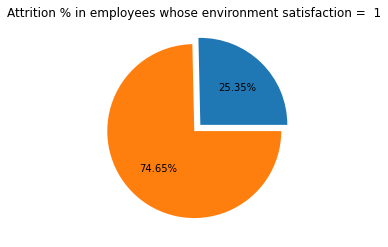

In [43]:
size = [data['EnvironmentSatisfaction'][(data['Attrition'] == 'Yes') & (data['EnvironmentSatisfaction'] == 1)].count(),data['EnvironmentSatisfaction'][(data['Attrition'] == 'No') & (data['EnvironmentSatisfaction'] == 1)].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees whose environment satisfaction =  1')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

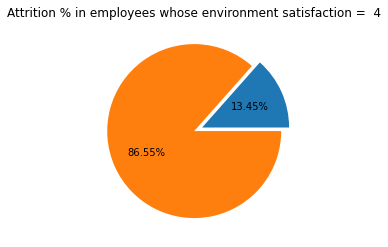

In [44]:
size = [data['EnvironmentSatisfaction'][(data['Attrition'] == 'Yes') & (data['EnvironmentSatisfaction'] == 4)].count(),data['EnvironmentSatisfaction'][(data['Attrition'] == 'No') & (data['EnvironmentSatisfaction'] == 4)].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees whose environment satisfaction =  4')
plt.axis('off')

<a id="3.6"></a>
### INFERENCES

* Most employees are from Research & Development department (65.37 %)
* Most employees have medium (Bachelor's) level of education (38.91 %)
* Most employees have Sales executive as their job role(22.18 %)
* As expected Attrition is relatively higher in employees with lower monthly income
* Attrition starts decreasing as employee's years at company reaches to 15 years
* MonthlyIncome, Age, PercentSalaryHike and YearsAtCompany features are greatly impacting Attrition rate.
* Attrition percentage is highest in employees who travel frequently(24.91 %)
* Attrition percentage is highest in employees who are from Sales department(20.63 %)
* Attrition percentage is highest in employees who are from Technical degree education field(24.24 %)
* Attrition percentage is highest in male employees (17.01 %)
* Attrition percentage is highest in employees who do overtime(30.53 %)
* Attrition percentage is highest in employees who has 1(low) of Environment Satisfaction(25.35 %)

<a id="4"></a>
# FEATURE ENGINEERING

EmployeeCount,Over18 and StandardHours contains a single unique value.So these features will not be useful for either visualization or modelling. 
EmployeeNumber feature is just an identifier and it's not required for modelling either.

In [45]:
df = pd.read_csv("../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.drop(['EmployeeCount'],axis = 1, inplace = True)
df.drop(['StandardHours'],axis = 1,inplace = True)
df.drop(['Over18'],axis = 1,inplace = True)
df.drop(['EmployeeNumber'],axis = 1,inplace = True)

In [46]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


<a id="4.1"></a>
### CORRELATION BETWEEN FEATURES

<AxesSubplot:>

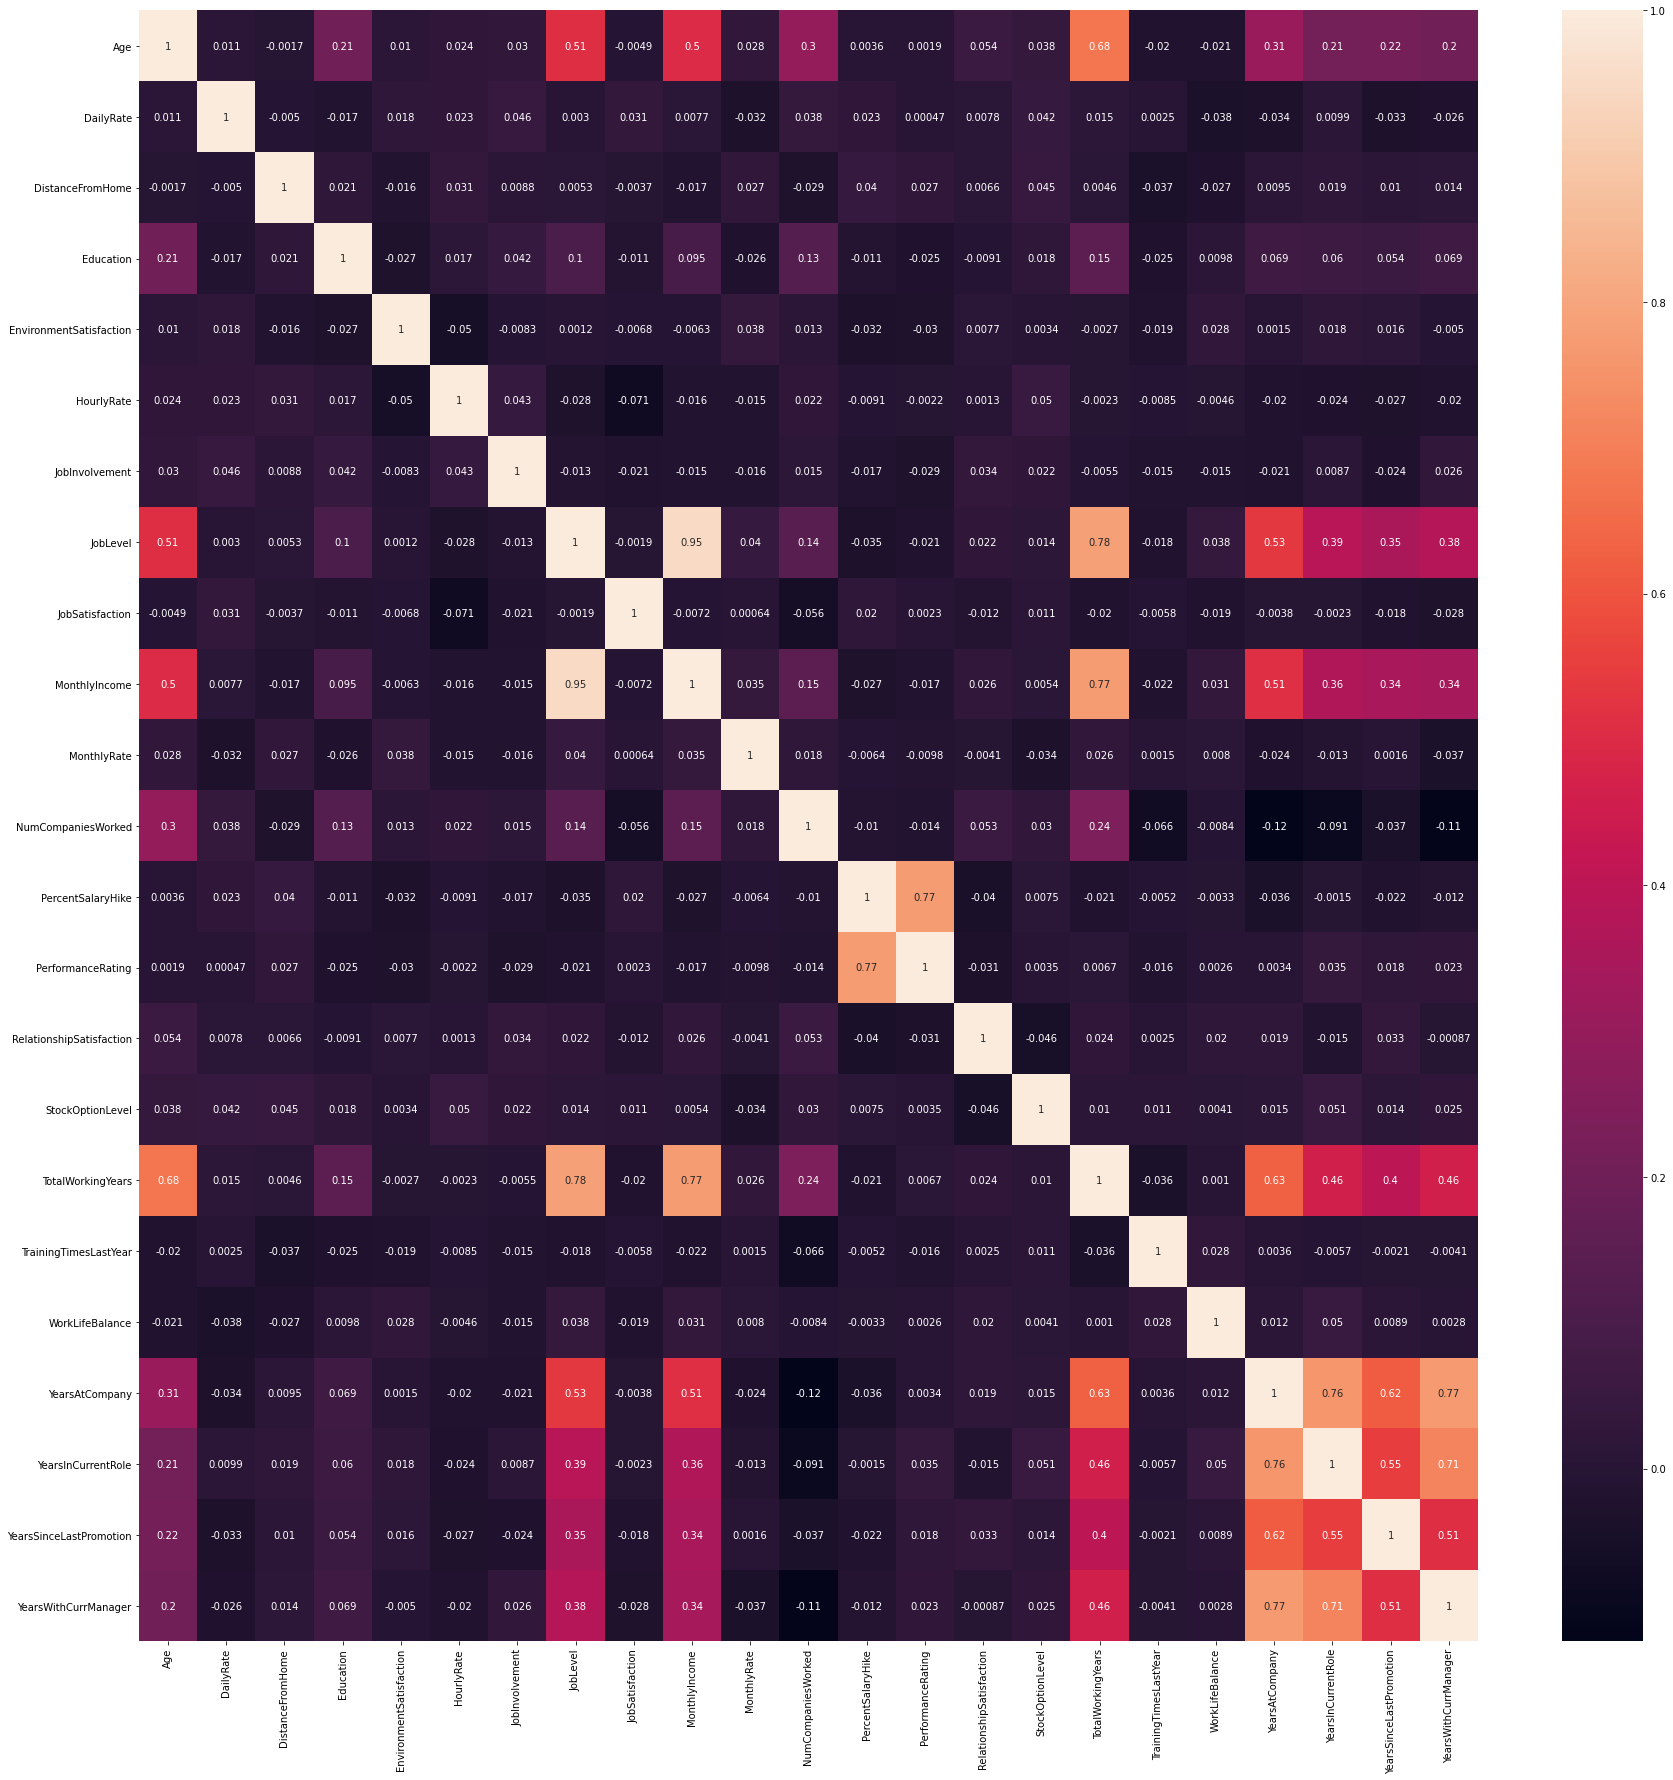

In [47]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot = True)

Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. 
Highly correlated features are -:
* JobLevel and MonthlyIncome  - 0.95
* JobLevel and TotalWorkingYears - 0.78
* MonthlyIncome and TotalworkingYears - 0.77
* PercentSalaryHike and PerformanceRating - 0.77
* YearsAtCompany and YearsWithCurrManager - 0.77
* YearsAtCompany and YearsInCurrRole - 0.76
* YearsInCurrentRole and YearsWithCurrentManager  - 0.71

We will drop the features which are highly correalated with each other

In [48]:
df.drop(['JobLevel'],axis = 1,inplace = True)
df.drop(['TotalWorkingYears'],axis = 1,inplace = True)
df.drop(['PerformanceRating'],axis = 1,inplace = True)
df.drop(['YearsWithCurrManager'],axis = 1,inplace = True)
df.drop(['YearsInCurrentRole'],axis = 1,inplace = True)

In [49]:
cat_features.remove('JobLevel')
cat_features.remove('PerformanceRating')

In [50]:
cat_features

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'OverTime',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [51]:
num_features.remove('TotalWorkingYears')
num_features.remove('YearsInCurrentRole')
num_features.remove('YearsWithCurrManager')

In [52]:
num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

<a id="4.2"></a>
### FEATURE SCALING

In [53]:
le = LabelEncoder()
for feature in cat_features:
    df[feature] = le.fit_transform(df[feature])

In [54]:
sc = StandardScaler()
for feature in num_features:
    df[feature] = sc.fit_transform(np.array(df[feature]).reshape(-1,1))

In [55]:
df['Attrition'] = le.fit_transform(df['Attrition'])

In [56]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.446350,1,2,0.742527,2,-1.010909,1,1,1,0,...,0.726020,8,1,-1.150554,0,0,0,0,-0.164613,-0.679146
1,1.322365,0,1,-1.297775,1,-0.147150,0,1,2,1,...,1.488876,1,0,2.129306,3,1,3,2,0.488508,-0.368715
2,0.008343,1,2,1.414363,1,-0.887515,1,4,3,1,...,-1.674841,6,1,-0.057267,1,0,3,2,-1.144294,-0.679146
3,-0.429664,0,1,1.461466,1,-0.764121,3,1,3,0,...,1.243211,1,1,-1.150554,2,0,3,2,0.161947,0.252146
4,-1.086676,0,2,-0.524295,1,-0.887515,0,3,0,1,...,0.325900,9,0,-0.877232,3,1,3,2,-0.817734,-0.058285


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int64  
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   int64  
 12  JobRole                   1470 non-null   int64  
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

<a id="5"></a>
# TRAIN-TEST SPLIT

<a id="5.1"></a>
### Stratified K-Fold

In [58]:
X = df.drop(['Attrition'],axis = 1)
y = df['Attrition']

In [59]:
skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(X,y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


<a id="6"></a>
# MODEL BUILDING

Following are the classification algorithms I will use to make the model:

1. Logistic Regression
1. Decision Trees
1. Naive Bayes
1. Support Vector Machines(Linear)
1. Random Forest Classifier

In [60]:
skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(X,y)
accuracy=[]
mean_acc = []
classifiers=['Logistic Regression','Decision Tree','Naive Bayes','Linear SVM', 'Random Forest Classifier']
models=[LogisticRegression(),DecisionTreeClassifier(criterion = 'entropy',max_depth = 3),GaussianNB(),svm.SVC(kernel = 'linear'),RandomForestClassifier(n_estimators = 1000)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = skf,scoring = "accuracy")
    mean_acc.append(cv_result.mean())
    accuracy.append(cv_result)

<a id='7' ></a>
# MODEL EVALUATION

<a id="7.1"></a>
### MODEL ACCURACIES

In [61]:
models_acc_df = pd.DataFrame(accuracy,index = [classifiers])
cols = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']
models_acc_df.columns = cols
models_acc_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Logistic Regression,0.863946,0.850340,0.860544,0.867347,0.870748
Decision Tree,0.836735,0.836735,0.853741,0.850340,0.850340
Naive Bayes,0.894558,0.853741,0.840136,0.840136,0.850340
Linear SVM,0.836735,0.867347,0.857143,0.870748,0.860544
Random Forest Classifier,0.853741,0.863946,0.874150,0.857143,0.860544


In [62]:
models_mean_acc_df = pd.DataFrame(mean_acc,index = [classifiers])
models_mean_acc_df.columns = ['Mean Accuracy']
models_mean_acc_df

,Mean Accuracy
Logistic Regression,0.862585
Decision Tree,0.845578
Naive Bayes,0.855782
Linear SVM,0.858503
Random Forest Classifier,0.861905


<AxesSubplot:>

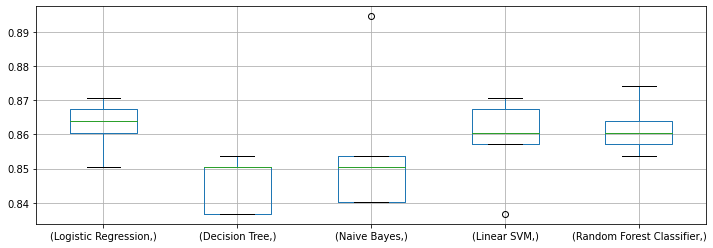

In [63]:
plt.subplots(figsize=(12,4))
box = pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

<a id="7.2"></a>
### MEAN ACCURACY OF CLASSIFICATION MODELS

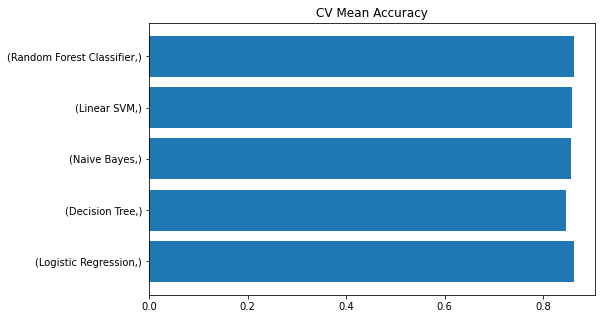

In [64]:
models_mean_acc_df['Mean Accuracy'].plot.barh(width=0.8)
plt.title('CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<a id="7.3"></a>
### CONFUSION MATRIX OF ALL THE MODELS

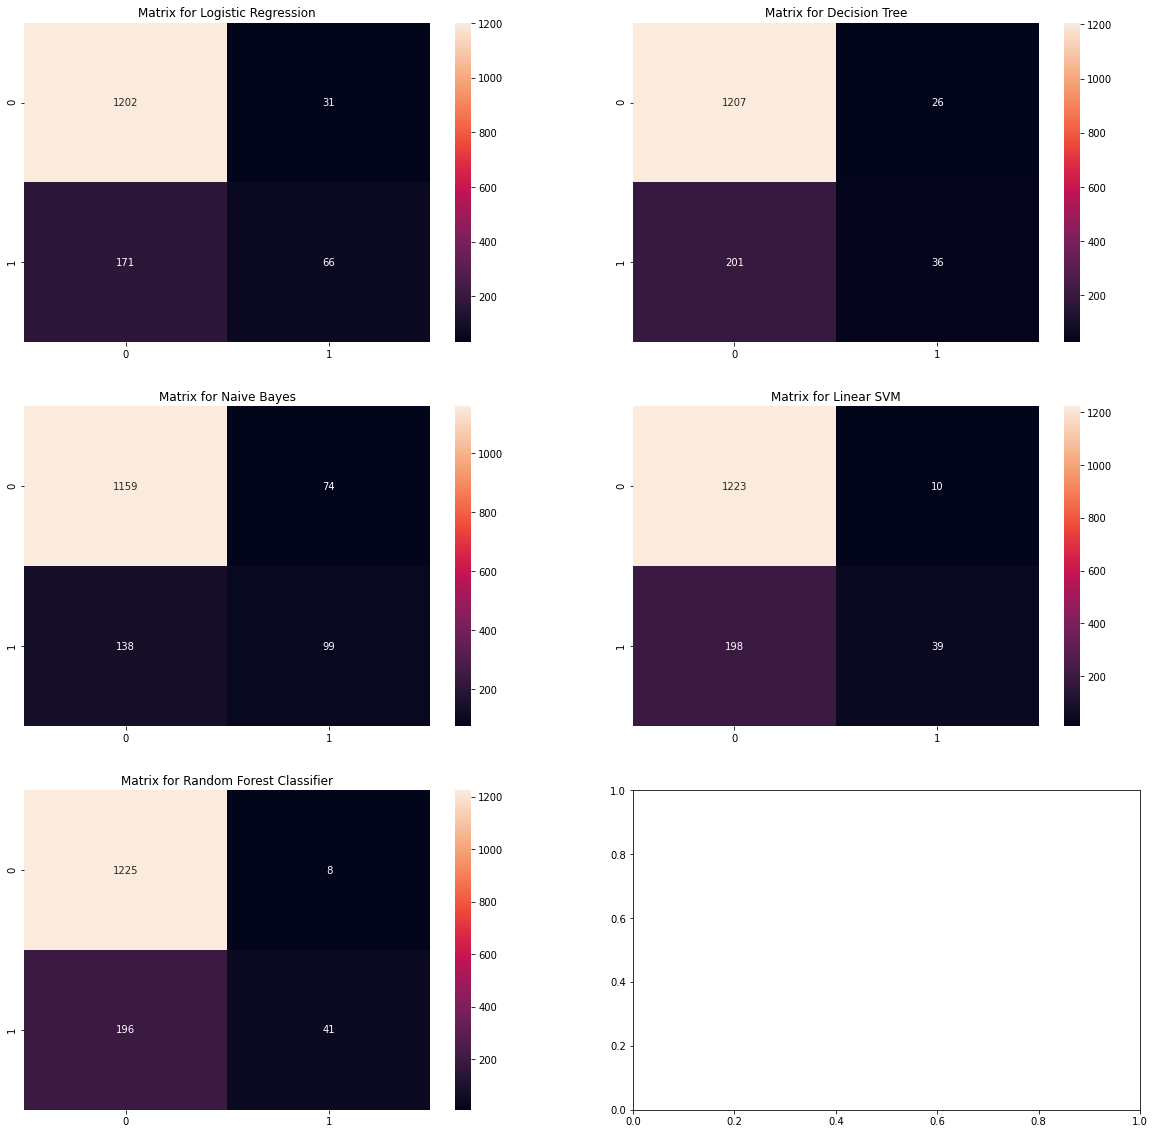

In [65]:
f,ax=plt.subplots(3,2,figsize=(20,20))

y_pred = cross_val_predict(LogisticRegression(),X,y,cv= skf)
c_reportLR = classification_report(y,y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0][0],annot=True,fmt='2.0f')
ax[0][0].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',max_depth = 3),X,y,cv= skf)
c_reportDT = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0][1],annot=True,fmt='2.0f')
ax[0][1].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,y,cv= skf)
c_reportNB = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1][0],annot=True,fmt='2.0f')
ax[1][0].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(svm.SVC(kernel = 'linear'),X,y,cv = skf)
c_reportSVM = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax = ax[1][1],annot = True, fmt = '2.0f')
ax[1][1].set_title('Matrix for Linear SVM')


y_pred = cross_val_predict(RandomForestClassifier(n_estimators = 1000), X,y,cv = skf)
c_reportRFM = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred), ax = ax[2][0], annot = True, fmt = '2.0f')
ax[2][0].set_title('Matrix for Random Forest Classifier')
plt.show()

<a id ='7.4'></a>
### CLASSIFICATION REPORT OF ALL THE MODELS

LOGISTIC REGRESSION

In [66]:
print(c_reportLR)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1233
           1       0.68      0.28      0.40       237

    accuracy                           0.86      1470
   macro avg       0.78      0.63      0.66      1470
weighted avg       0.84      0.86      0.84      1470



DECISION TREE

In [67]:
print(c_reportDT)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1233
           1       0.58      0.15      0.24       237

    accuracy                           0.85      1470
   macro avg       0.72      0.57      0.58      1470
weighted avg       0.81      0.85      0.81      1470



NAIVE BAYES

In [68]:
print(c_reportNB)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1233
           1       0.57      0.42      0.48       237

    accuracy                           0.86      1470
   macro avg       0.73      0.68      0.70      1470
weighted avg       0.84      0.86      0.85      1470



LINEAR SVM

In [69]:
print(c_reportSVM)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.80      0.16      0.27       237

    accuracy                           0.86      1470
   macro avg       0.83      0.58      0.60      1470
weighted avg       0.85      0.86      0.82      1470



RANDOM FOREST

In [70]:
print(c_reportRFM)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.84      0.17      0.29       237

    accuracy                           0.86      1470
   macro avg       0.85      0.58      0.60      1470
weighted avg       0.86      0.86      0.82      1470

